# Visualization - Data Science Kaggle Survey 

In this notebook you will work on your visualisation skills. In the repo you will find a dataset from Kaggle. Every year, Kaggle conducts a survey on the topic of Data Science and Machine Learning. An invitation to participate in the survey is sent out to the entire Kaggle community. The survey is also promoted on the Kaggle website and Kaggle Twitter channel. The 2020 survey results were used as data for a Kaggle competition held at the end of the year. When evaluating the submissions, particular attention was paid to originality, a good structure/narrative and, last but not least **informative and appealing visualisations**.

The survey contained 35 questions, most of which were multiple-choice. These questions allowed either one or more selected answers. Responses to multiple-choice questions where only a single choice could be selected were recorded in individual columns. Responses to multiple selection questions (multiple choices can be selected) were split into multiple columns (with one column per answer choice).

Since this kind of data structure requires a lot of preprocessing before the visualization part can even begin, we decided to make the task a little easier. 
The dataset [kaggle_survey.csv](kaggle_survey.csv) that you will use for the following exercise contains only the questions whose responses where collected in a single column. 
If you need further information about the [methodology](kaggle_survey_2020_methodology.pdf) of the survey or the [questions](kaggle_survey_2020_answer_choices.pdf) and their possible answer options you will find two PDF-files with additional information in this repo.

## Your Task

Let's imagine the following scenario:

You got a new dataset from one of your stakeholders. Addintionally to the dataset you received an email with a couple of very specific questions your stakeholder is interested in. 
Your task for this exercise is to create plots that clearly visualise the answers to your stakeholder's questions.

You will find your stakeholder's questions further down in the notebook. To help you get started and get an overview over the data we prepared a list of all the questions, which are still included in the shortened dataset: 


| Question # | Database Column                  | Question                                                                                                                                                                    |      
| ---------- | -------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | 
| Q1         | age_range                        | What is your age (# years)?                                                                                                                                                 |                |           |                                    |
| Q2         | gender                           | What is your gender?                                                                                                                                                        |                |           |                                    |
| Q3         | county_residence                 | In which country do you currently reside?                                                                                                                                   |                |           |                                    |
| Q4         | highest_education                | What is the highest level of formal education that you have attained or plan to attain within the next 2 years?                                                             |                |           |                                    |
| Q5         | latest_job_role                  | Select the title most similar to your current role (or most recent title if retired)                                                                                        |                |           |                                    |
| Q6         | years_of_programming             | For how many years have you been writing code and/or programming?                                                                                                           |                |           |                                    |
| Q8         | programming_language_recommended | What programming language would you recommend an aspiring data scientist to learn first?                                                                                    |                |           |                                    |
| Q11        | computing_platforms              | What type of computing platform do you use most often for your data science projects?                                                                                       |                |           |                                    |
| Q13        | times_tpu_used                   | Approximately how many times have you used a TPU (tensor processing unit)?                                                                                                  |                |           |                                    |
| Q15        | years_of_experience              | For how many years have you used machine learning methods?                                                                                                                  |                |           |                                    |
| Q20        | size_of_company                  | What is the size of the company where you are employed?                                                                                                                     |                |           |                                    |
| Q21        | number_of_data_scientists        | Approximately how many individuals are responsible for data science workloads at your place of business?                                                                    |                |           |                                    |
| Q22        | employer_incorporate_ml          | Does your current employer incorporate machine learning methods into their business?                                                                                        |                |           |                                    |
| Q24        | yearly_earnings                  | What is your current yearly compensation (approximate \$USD)?                                                                                                                |                |           |                                    |
| Q25        | money_spend_on_cloud             | Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate \$USD)? |                |           |                                    |
| Q30        | most_used_data_products          | Which of the following big data products (relational database                                                                                                                data warehouse  data lake  or similar) do you use most often? |
| Q32        | most_used_bi_tool                | Which of the following business intelligence tools do you use most often?                                                                                                   |                |           |                                    |
| Q38        | primary_tool_data_analysis       | What is the primary tool that you use at work or school to analyze data?                                                                                                    |                |           |                                    |
|            |                                  |                                                                                                                                                                             |                |           |                                    |



## Setup and Import

As always, the first step is to import the required libraries and data. Since we do not want to run the SQL query every time, we can simply import the csv file we created in the first notebook.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("kaggle_survey.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'kaggle_survey.csv'

In [ ]:
df.loc[df['county_residence'] == 'United Kingdom of Great Britain and Northern Ireland', 'county_residence'] = 'UK'
df.loc[df['county_residence'] == 'United States of America', 'county_residence'] = 'USA'


## Getting to Know the Data

Before you can start visualizing, you should get an overview of the data. Is the format of the data suitable for visualization or do you need to adjust something here and there?

In [ ]:
df.head()

,id,age_range,gender,county_residence,highest_education,latest_job_role,years_of_programming,programming_language_recommended,computing_platforms,times_tpu_used,years_of_experience,size_of_company,number_of_data_scientists,employer_incorporate_ml,yearly_earnings,money_spend_on_cloud,most_used_data_products,most_used_bi_tool,primary_tool_data_analysis
0,7232,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,1-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
1,7233,30-34,Man,USA,Master’s degree,Data Engineer,5-10 years,Python,A personal computer or laptop,2-5 times,1-2 years,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","100,000-124,999","$100,000 or more ($USD)",PostgresSQL,Microsoft Power BI,"Business intelligence software (Salesforce, Ta..."
2,7234,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,R,A personal computer or laptop,Never,I do not use machine learning methods,"1000-9,999 employees",0,No (we do not use ML methods),"15,000-19,999",$0 ($USD),NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
3,7235,30-34,Man,USA,Master’s degree,Data Scientist,5-10 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,3-4 years,250-999 employees,5-9,"We have well established ML methods (i.e., mod...","125,000-149,999","$10,000-$99,999",MySQL,NaN,"Local development environments (RStudio, Jupyt..."
4,7236,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualisations



Now that you have a feel for the data, let's start to work on the tasks of your stakeholder. 

### 1. Plot

Your stakeholder wants to have a visual comparison between the yearly compensation of people who work as Data Scientists, Data Analysts, and Data Engineers. 

Unfortunately with the format of the entries in column "Q24" plotting the data is really cumbersome. Since the focus of this exercise is on plotting we will assist you a bit with the data preparation and provide you with a code snippet that will transform the strings in this column into one integer per entry, which then can be easily plotted. (Maybe you need to adapt the name of the dataframe etc. to get the code running.) 

In [ ]:
# Create a new dataframe for compensation / job title
compensation = df[['latest_job_role', 'yearly_earnings']].copy() # Copy job (latest_job_role) and salary (yearly_earnings) columns in a new dataframe
compensation.dropna(inplace=True) # drop (remove) rows with NAs

# Define function for extracting the first number of compensation column
def get_first_number(x):
    x = x.split('-')[0]
    x = x.replace(',', '').replace('>', '').replace('$', '').lstrip()
    return int(x)

# Apply function to Q24 column to generate new column
compensation['Salary'] = compensation['yearly_earnings'].apply(lambda x: get_first_number(x))

# Filter dataframe for relevant job titles 
data_compensation = compensation[compensation['latest_job_role'].
                                 isin(['Data Scientist', 'Data Analyst','Data Engineer'])]
data_compensation.head()

,latest_job_role,yearly_earnings,Count,Salary
45,Data Analyst,$0-999,301,0
46,Data Analyst,"1,000-1,999",87,1000
47,Data Analyst,"10,000-14,999",85,10000
48,Data Analyst,"100,000-124,999",51,100000
49,Data Analyst,"125,000-149,999",16,125000


##### 1.1 Plotting a categorical bar plot for different Data Roles and their Salaries

NOTE: Error bars are confidence intervals by default in Seaborn catplot and not standard errors or standard deviation

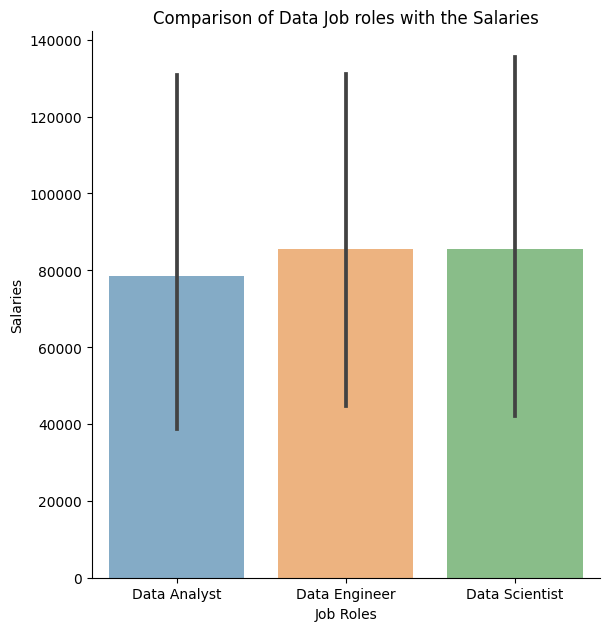

In [ ]:
g = sns.catplot(
    data=data_compensation, kind="bar",
    x="latest_job_role", y="Salary",
    alpha=.6, height=6
)

plt.xlabel("Job Roles")
plt.ylabel("Salaries")
g.set(title="Comparison of Data Job roles with the Salaries")
plt.show()

### 2. Plot

Your stakeholder wants to know the gender distribution in the countries where most people participated in the survey. He is interested in the top 10 countries.
And in the top 10 countries with the most number of female survey participants.


##### 2.1 Plotting a count pot for top 10 countries by participants showing distribution of different genders among the m

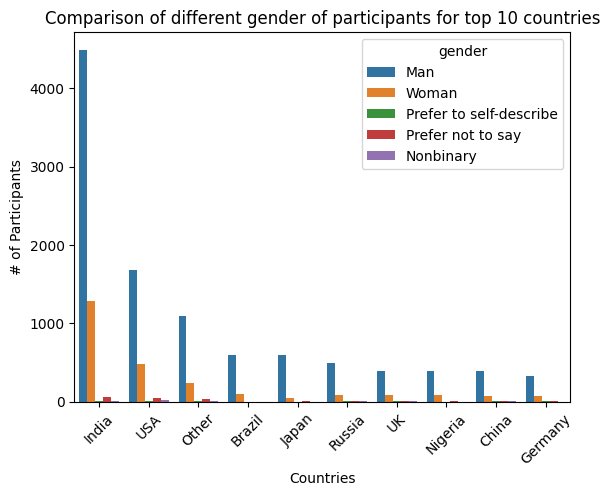

In [ ]:
sns.countplot(data=df, x='county_residence', hue='gender',
    order = df['county_residence'].value_counts().index[:10])

plt.xticks(rotation=45)
plt.xlabel("Countries")
plt.ylabel("# of Participants")
plt.title("Comparison of different gender of participants for top 10 countries")
plt.show()

##### 2.2 Creating a new Dataframe with countries and the gender distribution of the participants from those countries

In [ ]:
gender_df = df.groupby(['county_residence', 'gender'])['gender'].count().rename("gender_count")
gender_df = gender_df.to_frame().reset_index()
gender_df.head(10)
#gender_df

,county_residence,gender,gender_count
0,Argentina,Man,111
1,Argentina,Prefer not to say,3
2,Argentina,Woman,20
3,Australia,Man,182
4,Australia,Nonbinary,2
5,Australia,Prefer not to say,7
6,Australia,Prefer to self-describe,2
7,Australia,Woman,38
8,Bangladesh,Man,118
9,Bangladesh,Prefer not to say,1


##### 2.3 Getting top 10 countries by woman participants

In [ ]:
woman_countries_top_10 = gender_df[gender_df['gender'] == 'Woman'].sort_values(by='gender_count', ascending=False).head(10)
woman_countries_top_10

,county_residence,gender,gender_count
56,India,Woman,1289
179,USA,Woman,483
106,Other,Woman,241
19,Brazil,Woman,93
174,UK,Woman,91
169,Turkey,Woman,87
101,Nigeria,Woman,81
130,Russia,Woman,80
61,Indonesia,Woman,79
22,Canada,Woman,71


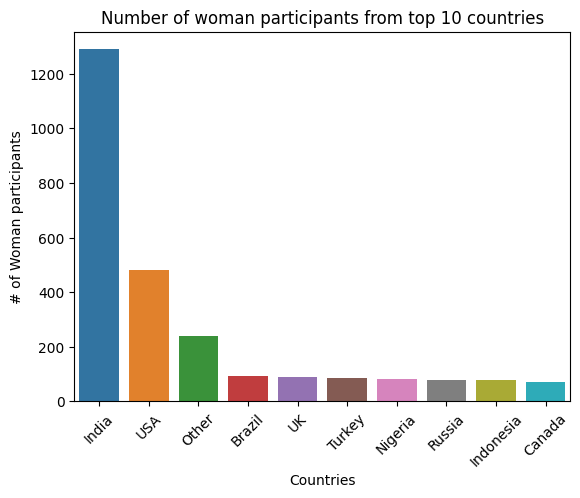

In [ ]:
sns.barplot(x='county_residence', y='gender_count', data=woman_countries_top_10) 

plt.xticks(rotation=45)
plt.ylabel("# of Woman participants")
plt.xlabel("Countries")
plt.title("Number of woman participants from top 10 countries")
plt.show()

### 3. Plot

According to the study, aspiring Data Scientists are most often recommended to learn Python. Since Python is widely known in the stakeholder's company, he would like to know which language is most recommended after Python. He also suspects that there might be a difference in recommended languages depending on the title of the survey participant's current role and he wants to know what people with the job title "Data Scientist", "Data Analyst", and "Data Engineer" recommend. Can you confirm or reject his assumption with a/some suitable plot(s)?

##### 3.1 Plotting a count plot for all the recommended programming languages by the survey participants

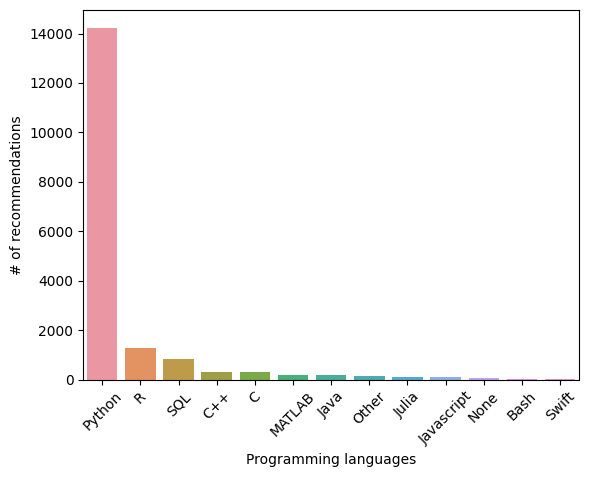

In [ ]:
sns.countplot(x=df['programming_language_recommended'],
                    order = df['programming_language_recommended'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Programming languages")
plt.ylabel("# of recommendations")
plt.show();

In [ ]:
## Top 5 programming languages
df.programming_language_recommended.value_counts()[:5]

Python    14241
R          1259
SQL         849
C++         325
C           301
Name: programming_language_recommended, dtype: int64

In [ ]:
## Taking the columns latest_job_role and programming_language_recommended to create a separate data frame
prog_languages = df[['latest_job_role', 'programming_language_recommended']]

## Creating a new data frame where latest_job_role are in Data Scientist', 'Data Analyst','Data Engineer
data_roles = prog_languages[prog_languages['latest_job_role'].
                                 isin(['Data Scientist', 'Data Analyst','Data Engineer'])]

## Selecting only top 5 programming languages for job roles of Data Scientist', 'Data Analyst','Data Engineer
data_roles = data_roles[data_roles['programming_language_recommended'].
                                        isin(['Python', 'R', 'SQL', 'C++', 'C'])]

##### 3.2 Plotting the recommended programming languages with respect to different Data job roles

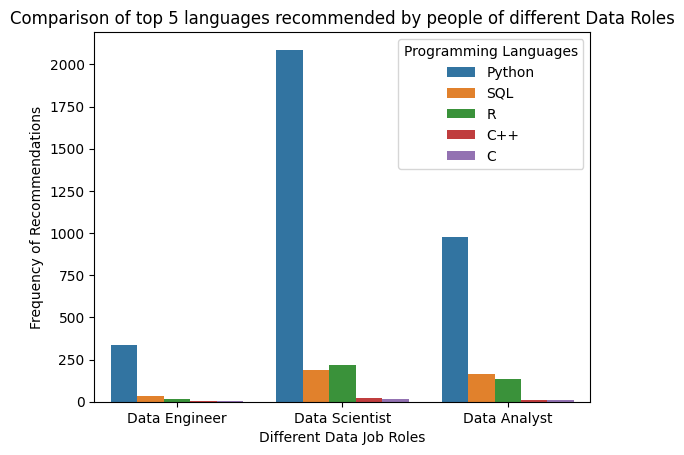

In [ ]:

sns.color_palette("Set2")
sns.countplot(data=data_roles, x='latest_job_role', hue='programming_language_recommended')

#plt.xticks(rotation=45)
plt.xlabel("Different Data Job Roles")
plt.ylabel("Frequency of Recommendations")
plt.title("Comparison of top 5 languages recommended by people of different Data Roles")
plt.legend(title='Programming Languages')
plt.show()

### Extra 

Now its up to you. If you're still motivated have another look at the data. What do you think is interesting or maybe different than expected?